In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def FIR_filter(signal, weights):
    output = np.convolve(signal, weights)
    return output

def spectrum(signal):
    f, Pxx_den = signal.periodogram(signal)
    return f, Pxx_den


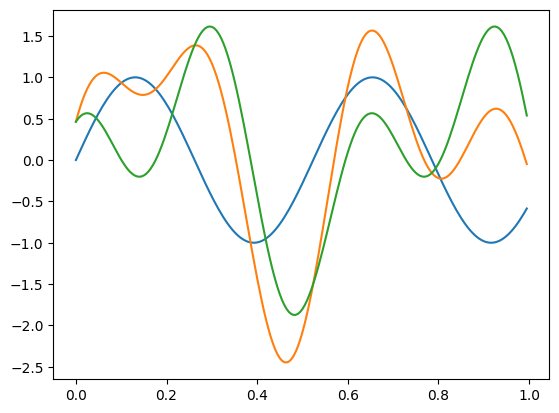

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


sfreq = 200
t = np.arange(0, 1, 1/sfreq)

def cs(x, y):
    """
    Compute the cross-spectrum of two time series.
    """
    N = len(x)
    X = np.fft.fft(x)
    Y = np.fft.fft(y)
    cs = np.conj(X)*Y
    cs = cs/N
    return cs


def generate_signal(sfreq, t):
    f = 0

    for freq in range(sfreq//2):
        if np.random.random() <= .3:
            f += np.random.random()*np.sin(2*np.pi*freq*t)

    return f


sig1 = np.sin(12*t)
sig2 = np.cos(20*t) + np.sin(10*t + 12) #+ sig1
# sig1 = generate_signal(sfreq, t)
# sig2 = generate_signal(sfreq, t)
s = sig1
u = sig2
v = s + u
# cs1 = cs(sin(2*t),)

# sp.signal.csd

plt.plot(t, s, t, v, t, u)
plt.show()

In [4]:
import csv

def append_row_to_csv(filename, row):
    # Open the CSV file in append mode
    with open(filename, 'a', newline='') as csvfile:
        # Create a CSV writer object
        writer = csv.writer(csvfile)
        # Add the row to the CSV file
        writer.writerow(row)

# Example usage:
append_row_to_csv('data.csv', ['John', 'Doe', '34'])

/home/user/Projects/NeuralGeometry/venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


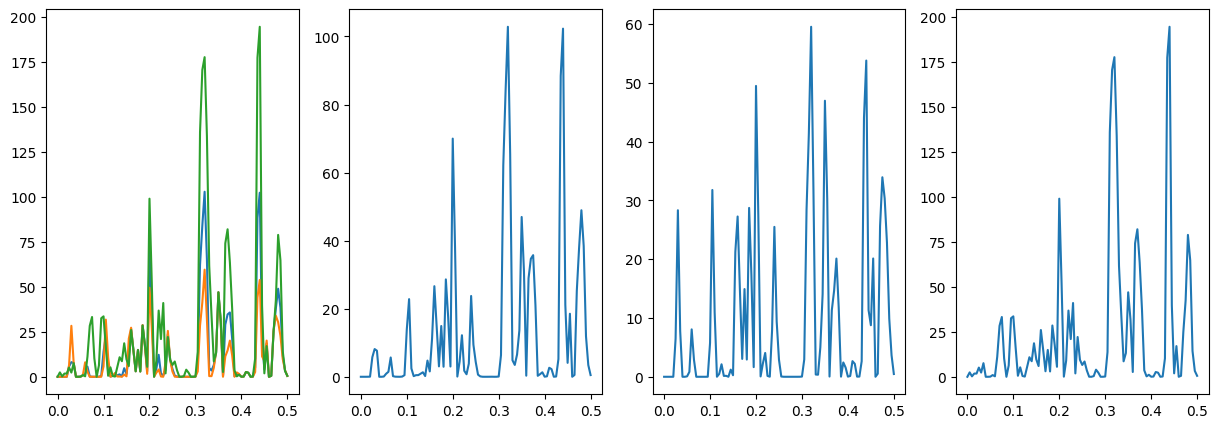

In [42]:
sig1 = generate_signal(sfreq, t)
sig2 = generate_signal(sfreq, t)
s = sig1
u = sig2
v = s + u

fig, ax = plt.subplots(1, 4)

# c1 = cs(s, v)
# c2 = cs(s, s)
# c3 = cs(v, v)

f1, c1 = sp.signal.csd(s, v)
f2, c2 = sp.signal.csd(s, s)
f3, c3 = sp.signal.csd(v, v)

ax[0].plot(f1, np.abs(c1), f1, np.abs(c2), f1, np.abs(c3))
ax[1].plot(f1, np.abs(c1))
ax[2].plot(f2, np.abs(c2))
ax[3].plot(f3, np.abs(c3))

fig.set_size_inches(15, 5)

/home/user/Projects/NeuralGeometry/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


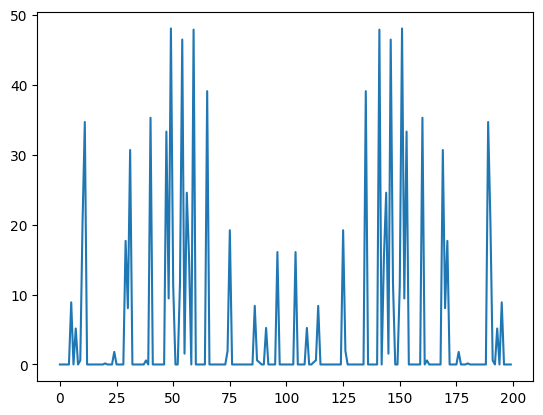

In [15]:
plt.plot(cs(sig1, sig1))

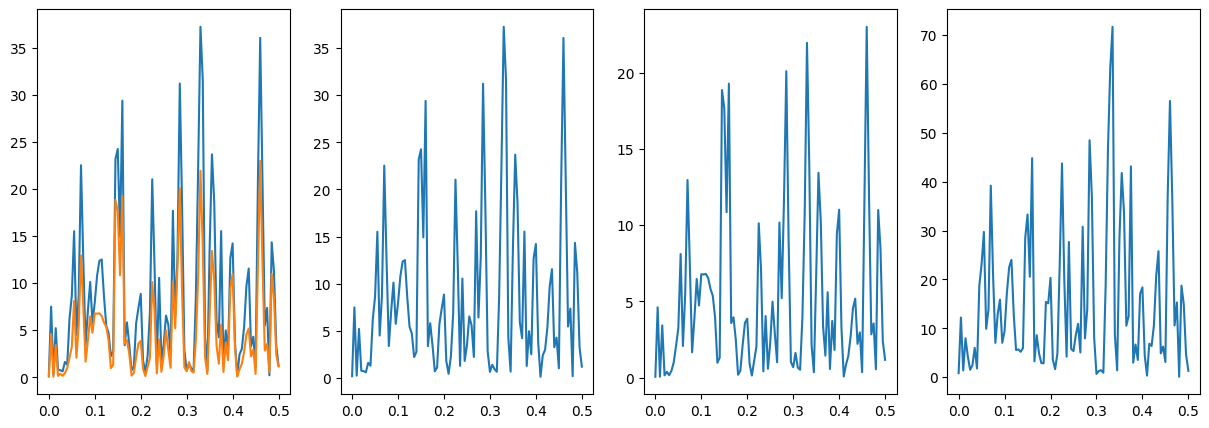

In [4]:
W = np.random.random((200, 100))
s_ = np.random.random((100,))
n = np.random.random((100,))
s = W@s_
u = W@n
v = s + u

f1, c1 = sp.signal.csd(s, v)
f2, c2 = sp.signal.csd(s, s)
f3, c3 = sp.signal.csd(v, v)

fig, ax = plt.subplots(1, 4)

ax[0].plot(
    f1, np.abs(c1),
    f1, np.abs(c2),
    # f1, np.abs(c3)
)
ax[1].plot(f1, np.abs(c1))
ax[2].plot(f2, np.abs(c2))
ax[3].plot(f3, np.abs(c3))

fig.set_size_inches(15, 5)
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def spectrum(x: np.ndarray, y: np.ndarray) -> np.ndarray:
	X=np.fft.fft(x)
	Y=np.fft.fft(y)
	Z=X*Y
	z=np.fft.ifft(Z)
	return z


x=np.array([1,2,3,4,5,6,7,8,9,10])
y=np.array([1,2,3,4,5,6,7,8,9,10])
z=spectrum(x,y)
print(z)


[265.+6.21724894e-16j 300.-1.27009514e-14j 325.-1.03194352e-14j
 340.-6.39410267e-15j 345.+7.99057243e-16j 340.+1.30471370e-15j
 325.+7.78162589e-15j 300.+1.44256678e-14j 265.+7.77836537e-15j
 220.-3.29666557e-15j]


In [28]:
import numpy as np
from scipy import signal

import numpy as np
import scipy.signal as signal


import os
import pickle
import functools


import functools
import os
import hashlib
import pickle


def read_or_compute(file_name_generator: callable = None):
    """
    This decorator reads the solution from a file, if exists or computes and saves it otherwise.
    :param file_name_generator: a function that generates the name of the file from parameters given to a wrapped
    function. If None, a default solution is used.
    :return: the solution
    if file_name_generator is None:
        def file_name_generator(*args, **kwargs):
            return hashlib.sha1(pickle.dumps((args, kwargs))).hexdigest()
    """

    if file_name_generator is None:
        file_name_generator = lambda *args, **kwargs: hashlib.sha1(pickle.dumps((args, kwargs))).hexdigest()

    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            file_name = file_name_generator(*args, **kwargs)
            if os.path.exists(file_name):
                with open(file_name, 'rb') as f:
                    return pickle.load(f)
            else:
                result = func(*args, **kwargs)
                with open(file_name, 'wb') as f:
                    pickle.dump(result, f)
                return result
        return wrapper
    return decorator


def get_weights(low_cutoff: float, high_cutoff: float, fs: float, order: int = 5) -> np.ndarray:
    """
    This function returns the weights of a bandpass filter.
    :param low_cutoff: the lower cutoff frequency
    :param high_cutoff: the higher cutoff frequency
    :param fs: the sampling frequency
    :param order: the order of the filter
    :return: the weights of the filter
    """
    nyq = 0.5 * fs
    low = low_cutoff / nyq
    high = high_cutoff / nyq
    b = signal.firwin(order, [low, high], pass_zero=False)
    return b


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def spectrum(x,fs):
    N=len(x)
    X=np.fft.fft(x)
    X_mag=np.abs(X)
    X_mag=X_mag/N
    X_mag=X_mag[range(int(N/2))]
    f=np.arange(0,int(N/2),1)
    f=f*fs/N
    plt.plot(f,X_mag)
    plt.title('Spectrum of the signal')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.show()


#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
#  file.py
#  
#  Copyright 2016  <pi@raspberrypi>
#  
#  This program is free software; you can redistribute it and/or modify
#  it under the terms of the GNU General Public License as published by
#  the Free Software Foundation; either version 2 of the License, or
#  (at your option) any later version.
#  
#  This program is distributed in the hope that it will be useful,
#  but WITHOUT ANY WARRANTY; without even the implied warranty of
#  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#  GNU General Public License for more details.
#  
#  You should have received a copy of the GNU General Public License
#  along with this program; if not, write to the Free Software
#  Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston,
#  MA 02110-1301, USA.
#  
#  


import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

import numpy as np
from scipy import signal as sig


def wpsd(x: np.ndarray, fs: float, nperseg: int = 256, noverlap: int = None, nfft: int = None,
         detrend: str = 'constant', return_onesided: bool = True, scaling: str = 'density',
         axis: int = -1) -> tuple[np.ndarray, np.ndarray]:
    """
    Compute the power spectral density of the signal at the input of the WIENER OPTIMAL filter.

    :param x: input signal
    :param fs: sampling frequency
    :param nperseg: length of each segment
    :param noverlap: number of points to overlap between segments
    :param nfft: length of the FFT used, if a zero padded FFT is desired
    :param detrend: type of detrending
    :param return_onesided: if True, return a one-sided spectrum for real data. If False return a two-sided spectrum.
    :param scaling: type of scaling
    :param axis: axis along which to compute the PSD. If axis is None, the PSD is computed over the entire array
    :return: frequencies and power spectral density
    """
    freqs, Pxx = sig.welch(x, fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft, detrend=detrend,
                           return_onesided=return_onesided, scaling=scaling, axis=axis)
    return freqs, Pxx

def main():
	
	return 0

if __name__ == '__main__':
	main()


In [25]:
import numpy as np
import scipy as sp
import scipy.signal as sl
import matplotlib.pyplot as plt


def plot_filter(fs: int, N: int, f: np.ndarray, g: np.ndarray) -> plt.Figure:
    """
    This function plots the filter.

    Parameters
    ----------
    fs : int
        Sampling frequency.
    N : int
        Number of samples.
    f : np.ndarray
        Input signal.
    g : np.ndarray
        Filter.

    Returns
    -------
    fig : plt.Figure
        Figure.
    h : np.ndarray
        Filter response.
    t : np.ndarray
        Time.
    f : np.ndarray
        Input signal.
    g : np.ndarray
        Filter.
    ff : np.ndarray
        Filtered signal.
    frange : np.ndarray
        Frequency range.
    finput : np.ndarray
        Input signal in frequency domain.
    foutput : np.ndarray
        Output signal in frequency domain.
    fresponce : np.ndarray
        Filter response in frequency domain.
    fpattern : np.ndarray
        Frequency pattern.
    """
    t = np.linspace(0, 1, fs)

    _, psd = sl.welch(f, fs=fs, nperseg=fs * 2)

    w, h = (lambda w, h: (w, h))(*sl.freqz(g, 1, worN=fs//2))

    frange = w / np.pi * fs / 2

    finput = psd[:-1]
    fresponce = np.abs(h)
    fpattern = finput * fresponce # frequency output
    foutput = fpattern * fresponce

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)

    ax1.plot(t, f)

    yticks = ax1.get_yticks()

    ff = np.convolve(f, g, mode="same")

    ax2.plot(t, ff, color='tab:orange')
    ax2.set_ylim(yticks[0], yticks[-1])

    ax3.plot(t, f)
    ax3.plot(t, ff, color='tab:orange')

    ax4.plot(frange, sp.stats.zscore(finput), color='tab:blue')
    ax4.plot(frange, sp.stats.zscore(foutput), color='tab:orange')
    ax4.plot(frange, sp.stats.zscore(fresponce), color='tab:green')

    ax5.plot(frange, sp.stats.zscore(finput), color='tab:blue')
    ax5.plot(frange, sp.stats.zscore(fpattern), color='tab:pink')
    ax5.plot(frange, sp.stats.zscore(fresponce), color='tab:green')

    ax6.plot(frange, sp.stats.zscore(foutput), color='tab:orange')
    ax6.plot(frange, sp.stats.zscore(fpattern), color='tab:pink')

    fig.set_size_inches(10, 10)

    return fig, h, t, f, g, ff, frange, finput, foutput, fresponce, fpattern




In [2]:
import numpy as np

np.random.random((10,))

array([0.53103165, 0.62390033, 0.152125  , 0.59612246, 0.33811308,
       0.05990605, 0.10201073, 0.28869021, 0.65301933, 0.25390702])

/home/user/Projects/NeuralGeometry/venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 400 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


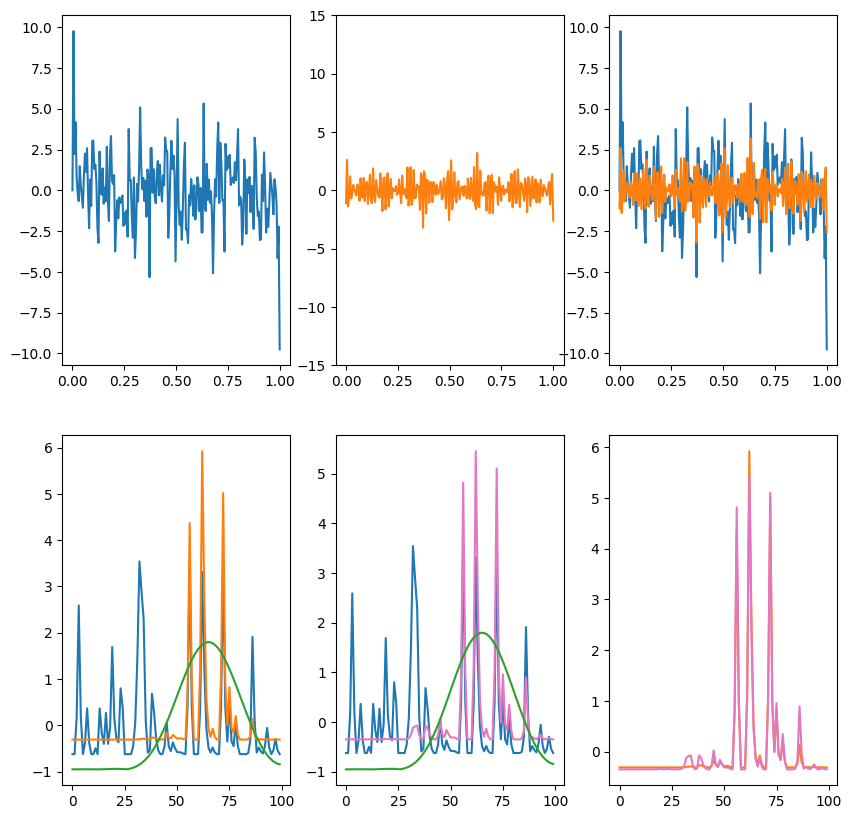

In [29]:
fs = 200
N = 15

t = np.arange(0, 1, 1/fs)

f = 0

for freq in range(fs//2):
    if np.random.random() <= .3:
        f += np.random.random()*np.sin(2*np.pi*freq*t)

# for freq in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
#     f += np.sin(2*np.pi*freq*t)

g = get_weights(50, 80, fs, N)

fig, h, t, f, g, ff, frange, finput, foutput, fresponce, fpattern = plot_filter(fs, N, f, g)

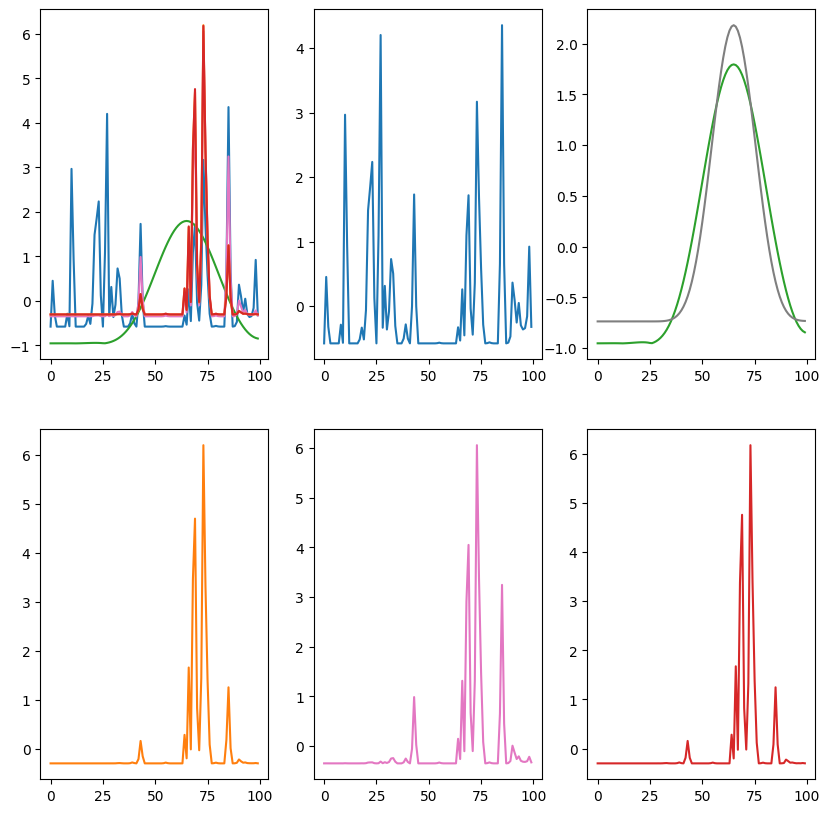

In [69]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)

_, psd = sl.welch(ff, fs=fs, nperseg=fs * 2)

funk = psd[:-1]

ax1.plot(frange, sp.stats.zscore(finput), color='tab:blue')
ax1.plot(frange, sp.stats.zscore(fresponce), color='tab:green')
ax1.plot(frange, sp.stats.zscore(fpattern), color='tab:pink')
ax1.plot(frange, sp.stats.zscore(foutput), color='tab:orange')
ax1.plot(frange, sp.stats.zscore(funk), color='tab:red')

ax2.plot(frange, sp.stats.zscore(finput), color='tab:blue')
ax3.plot(frange, sp.stats.zscore(fresponce), color='tab:green')
ax3.plot(frange, sp.stats.zscore(fresponce**2), color='tab:grey')
ax5.plot(frange, sp.stats.zscore(fpattern), color='tab:pink')
ax4.plot(frange, sp.stats.zscore(foutput), color='tab:orange')
ax6.plot(frange, sp.stats.zscore(funk), color='tab:red')

fig.set_size_inches(10, 10)


In [70]:
(funk - foutput).sum()

0.00028190591971879965

In [71]:
(funk - fpattern).sum()

-0.1997012266064584